<a href="https://colab.research.google.com/github/cristinaegus/Pandas_Python_IA/blob/main/SpanishWinesKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/spanish-wine-quality-dataset")

print("Path to dataset files:", path)

100%|██████████| 46.4k/46.4k [00:00<00:00, 470kB/s]

Extracting files...
Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\fedesoriano\spanish-wine-quality-dataset\versions\1
Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\fedesoriano\spanish-wine-quality-dataset\versions\1


In [9]:
import os
os.chdir(path)
os.listdir()

['wines_SPA.csv']

In [10]:
import pandas as pd
df = pd.read_csv(os.path.join(path, "wines_SPA.csv"))
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


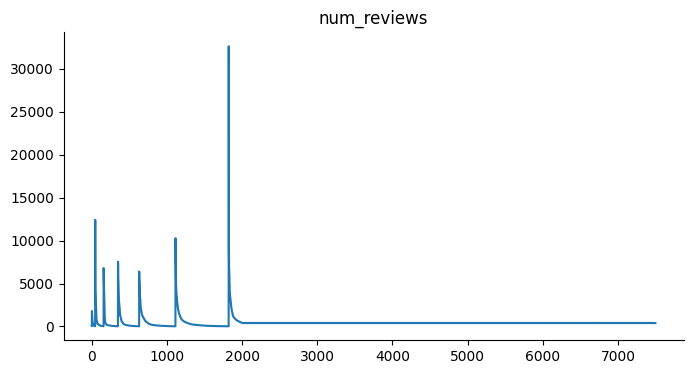

In [11]:
from matplotlib import pyplot as plt
df['num_reviews'].plot(kind='line', figsize=(8, 4), title='num_reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

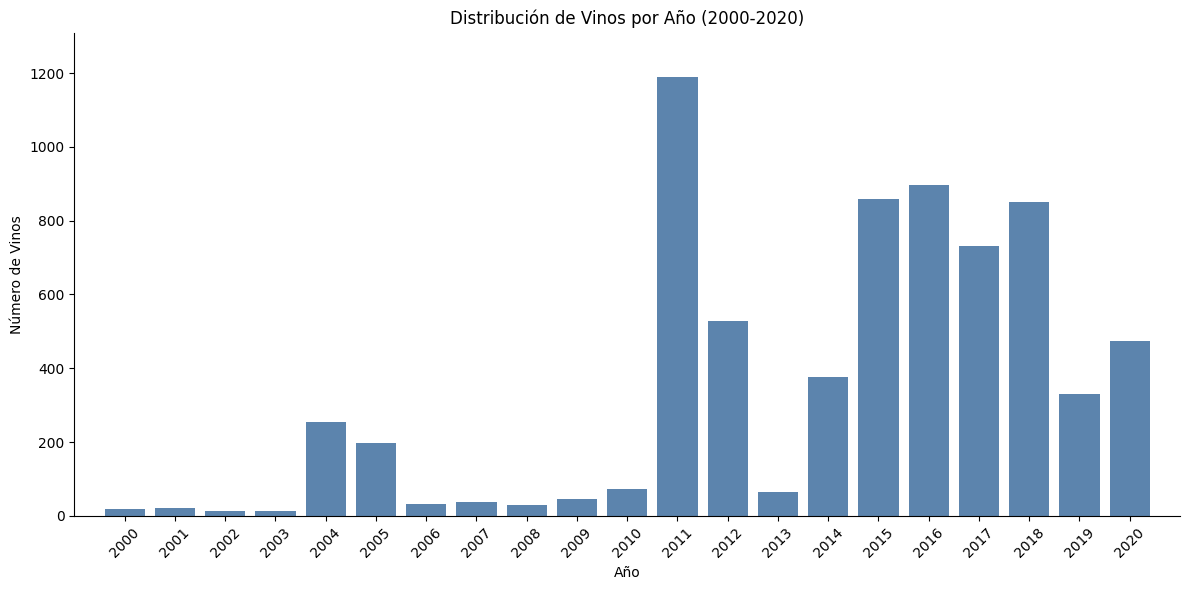

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

if 'df' in globals():
	# Agrupar por año y obtener los datos
	year_counts = df.groupby('year').size()
	
	# Convertir el índice a numérico, ignorando errores
	year_numeric = pd.to_numeric(year_counts.index, errors='coerce')
	
	# Filtrar años entre 2000 y 2020 y eliminar NaN
	mask = (year_numeric >= 2000) & (year_numeric <= 2020)
	filtered_years = year_counts[mask]
	
	# Crear el gráfico
	years = filtered_years.index
	counts = filtered_years.values
	y_pos = np.arange(len(years))
	
	# Gráfico de barras con color personalizado
	plt.figure(figsize=(12, 6))
	plt.bar(y_pos, counts, color=(0.2, 0.4, 0.6, 0.8))
	
	# Configurar etiquetas y límites
	plt.xticks(y_pos, years, rotation=45)
	plt.xlim(-1, len(years))  # Limitar el eje x
	plt.ylim(0, max(counts) * 1.1)  # Limitar el eje y con un poco de margen
	
	# Etiquetas y título
	plt.xlabel('Año')
	plt.ylabel('Número de Vinos')
	plt.title('Distribución de Vinos por Año (2000-2020)')
	
	# Remover bordes superior y derecho
	plt.gca().spines[['top', 'right']].set_visible(False)
	
	# Mostrar el gráfico
	plt.tight_layout()
	plt.show()
else:
	print("DataFrame 'df' is not defined. Please run the cell where 'df' is created.")

<Figure size 3000x1000 with 0 Axes>

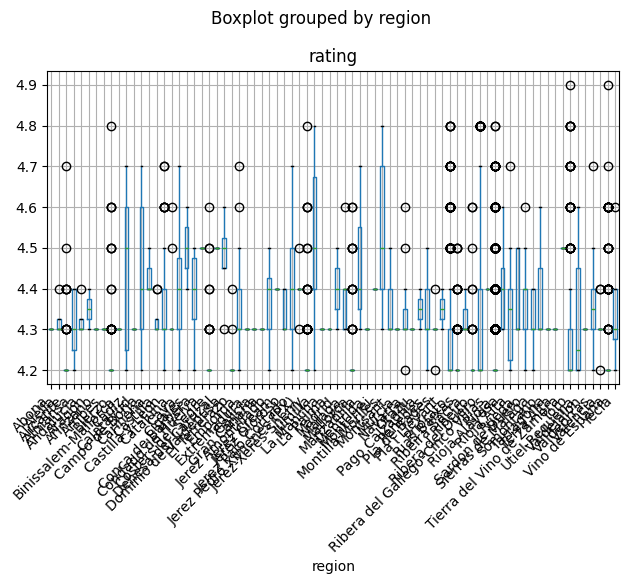

In [19]:
# Crea un boxplot en funcion de la columna "region"
import matplotlib.pyplot as plt

if 'df' in globals():
	# Crear figura con mayor ancho para mejor legibilidad
	plt.figure(figsize=(30, 10))
	df.boxplot(column="rating", by="region", rot=100, fontsize=10)

	# Ajustar el espaciado para que se lean mejor las etiquetas
	plt.tight_layout()
	plt.subplots_adjust(bottom=0.2)

	# Mejorar la visualización de las etiquetas del eje x
	plt.xticks(rotation=45, ha='right')
	plt.show()
else:
	print("DataFrame 'df' is not defined. Please ejecuta la celda donde se crea 'df'.")

In [14]:
# leer solo los valores de rating
rating = df["rating"]
rating


0       4.9
1       4.9
2       4.8
3       4.8
4       4.8
       ... 
7495    4.2
7496    4.2
7497    4.2
7498    4.2
7499    4.2
Name: rating, Length: 7500, dtype: float64

In [17]:
# cual es el maximo valor y cual es el minimo
print(rating.max())
print(rating.min())


4.9
4.2


<Axes: xlabel='price', ylabel='rating'>

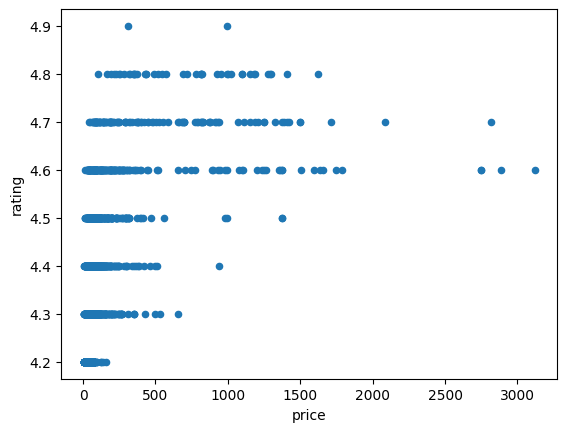

In [18]:
df.plot(kind='scatter', x='price', y='rating')

<Axes: xlabel='acidity', ylabel='price'>

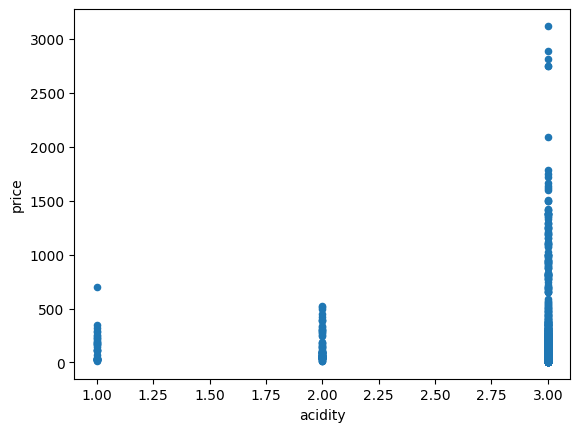

In [20]:
df.plot(kind='scatter', x='acidity', y='price')